In [12]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from moses_cross_val.main import moses_runner, model_evaluator, cross_val
from moses_cross_val.filters import loader
from utils import *
from dataset_utils import *
import matplotlib.pyplot as plt

In [3]:
# train_file, test_file = train_test_df_split("data/tamoxBinary_top100_genes.csv", "posOutcome")
train_file, test_file = "data/tamoxBinary_top100_genes_train.csv", "data/tamoxBinary_top100_genes_test.csv"

In [ ]:
cv_w_no_pen = cross_val.CrossValidation("tamoxBinary_top100_genes_train.csv", "data/cv_no_pen/",
                               "posOutcome", moses_options, cross_val_opts, "precision", 0.75)

cv_w_no_pen.run_folds()

In [12]:
cv_w_no_pen.dataset = "/home/xabush/moses-incons-pen-xp/data/tamoxBinary_top100_genes_test.csv"
cv_w_no_pen.filter_value = 0.80
ensemble_df = cv_w_no_pen.majority_vote()

In [19]:
df_no_pen = parse_combo_dir("data/cv_no_pen", train_file, test_file)
df_no_pen.head()

,model,complexity,fold,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and(or(!$ABCC5 $RFC4) $CCT3 $PFDN2) ...,34,0,0.946809,0.837647,0.721579,0.888889,0.496350,0.810526,0.793814,0.611146,0.802083,0.411765
1,or(and(or(and(or(and($CBX3 $RFC4) !$ABCC5) $PF...,34,0,0.946809,0.837647,0.721579,0.888889,0.496350,0.810526,0.793814,0.611146,0.802083,0.411765
2,or(and(or(and(or(and($CLUAP1 $RFC4) !$ABCC5) $...,34,0,0.941489,0.836879,0.718920,0.886108,0.496350,0.821053,0.804124,0.631115,0.812500,0.441176
3,or(and(or(and(or(and($RFC4 !$TRIM29) !$ABCC5) ...,34,0,0.944149,0.835294,0.716600,0.886392,0.489051,0.810526,0.785714,0.596440,0.797927,0.382353
4,or(and(or(and(or(!$ABCC5 $RFC4) $CBX3 $PFDN2) ...,32,0,0.946809,0.837647,0.721579,0.888889,0.496350,0.821053,0.795918,0.616409,0.808290,0.411765


<AxesSubplot:ylabel='balanced_acc_test'>

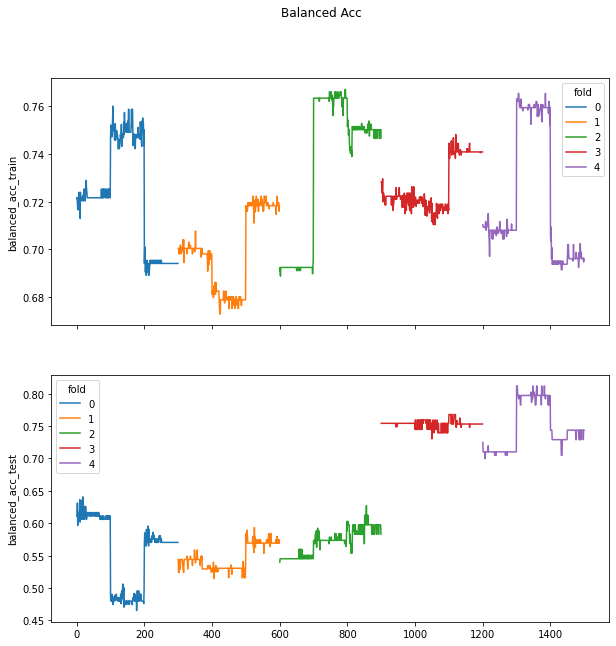

In [22]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Balanced Acc")

sns.lineplot(x=df_no_pen.index, y="balanced_acc_train", data=df_no_pen, hue="fold", ax=ax1)

sns.lineplot(x=df_no_pen.index, y="balanced_acc_test", data=df_no_pen, hue="fold", ax=ax2)

<AxesSubplot:ylabel='precision_test'>

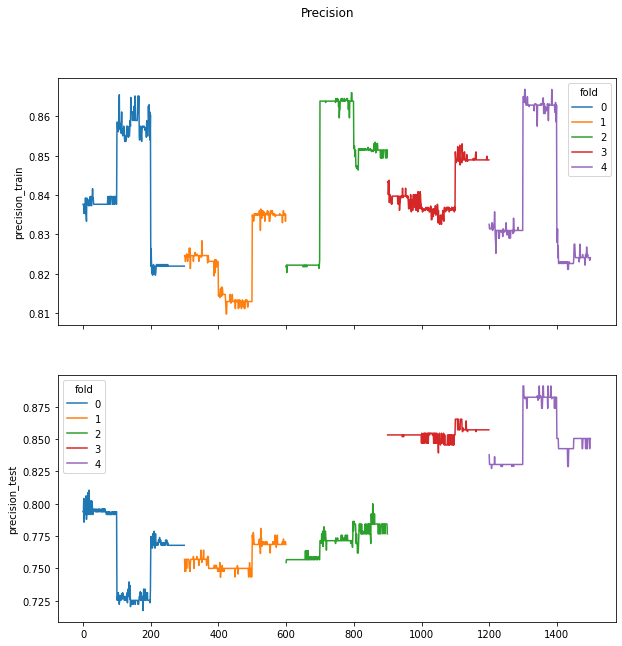

In [23]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Precision")

sns.lineplot(x=df_no_pen.index, y="precision_train", data=df_no_pen, hue="fold", ax=ax1)

sns.lineplot(x=df_no_pen.index, y="precision_test", data=df_no_pen, hue="fold", ax=ax2)

<AxesSubplot:ylabel='complexity'>

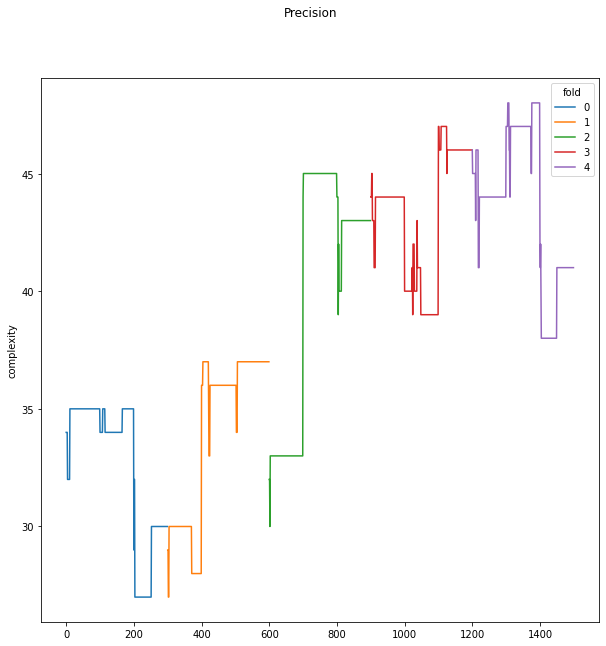

In [24]:

fig, ax1 = plt.subplots(1, sharex=True, figsize=(10, 10))

fig.suptitle("Precision")

sns.lineplot(x=df_no_pen.index, y="complexity", data=df_no_pen, hue="fold", ax=ax1)